In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import random
from scipy import stats
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.templates.default = 'plotly_white'

In [2]:
ranks = pd.read_pickle("data/gene_dependency_ranks_above_0-5.pkl")
#ranks = pd.read_csv("/home/ccoquide/Bureau/PhD/CNWW/PROJECT/GIT/cancer_networks/data/gene_dependency_ranks_above_0-5.csv")

In [3]:
correlation_matrix = ranks[ranks.columns].corr()
correlation_matrix.columns


Index(['ACH-000004', 'ACH-000005', 'ACH-000007', 'ACH-000009', 'ACH-000011',
       'ACH-000012', 'ACH-000013', 'ACH-000014', 'ACH-000015', 'ACH-000017',
       ...
       'ACH-001736', 'ACH-001737', 'ACH-001740', 'ACH-001745', 'ACH-001750',
       'ACH-001765', 'ACH-001814', 'ACH-001838', 'ACH-001956', 'ACH-001957'],
      dtype='object', length=625)

In [4]:
correlation_matrix.head()

,ACH-000004,ACH-000005,ACH-000007,ACH-000009,ACH-000011,ACH-000012,ACH-000013,ACH-000014,ACH-000015,ACH-000017,...,ACH-001736,ACH-001737,ACH-001740,ACH-001745,ACH-001750,ACH-001765,ACH-001814,ACH-001838,ACH-001956,ACH-001957
ACH-000004,1.000000,0.670811,0.634086,0.668743,0.627837,0.683202,0.674804,0.645831,0.678091,0.644843,...,0.674436,0.515364,0.682904,0.679575,0.653029,0.684327,0.600411,0.645787,0.694980,0.647552
ACH-000005,0.670811,1.000000,0.595817,0.612021,0.618527,0.637441,0.647392,0.605953,0.637074,0.631191,...,0.645563,0.508010,0.619845,0.642149,0.633958,0.655382,0.576940,0.615256,0.655533,0.635836
ACH-000007,0.634086,0.595817,1.000000,0.689916,0.659210,0.689017,0.686473,0.656473,0.689560,0.664908,...,0.662469,0.506101,0.665620,0.682570,0.668785,0.687120,0.623574,0.662435,0.697441,0.678311
ACH-000009,0.668743,0.612021,0.689916,1.000000,0.674617,0.745205,0.724943,0.690675,0.731248,0.682845,...,0.678239,0.542141,0.690460,0.706106,0.697572,0.726958,0.637741,0.685768,0.739834,0.726810
ACH-000011,0.627837,0.618527,0.659210,0.674617,1.000000,0.689373,0.700604,0.676628,0.684779,0.670969,...,0.672168,0.552894,0.666295,0.684159,0.700965,0.712906,0.643263,0.688556,0.730965,0.731748


In [5]:
T_Links={}
N=len(correlation_matrix.columns)
Cell=correlation_matrix.columns
ww=open("data/cell_lines_corr_above0_5.dat","w")

In [6]:
for j in range(N):
    for i in range(j+1,N):
        T_Links[str(j)+","+str(i)]=correlation_matrix[Cell[j]][Cell[i]]
        ww.write(str(j)+"\t"+str(i)+"\t"+str(correlation_matrix[Cell[j]][Cell[i]])+"\n")
ww.close()

In [7]:
def extract_bb(G,alp):
    keep_graph = nx.Graph()
    for i in G:
        neigh=G[i]
        k=len(neigh)
        if k>1:
            W=sum(G.get_edge_data(i,j)['weight'] for j in neigh)
            for j in neigh:
                p=1.0*G.get_edge_data(i,j)['weight']/W
                if (1-p)**(k-1) < alp:
                    keep_graph.add_edge(i,j, weight = G.get_edge_data(i,j))
    return keep_graph, 1.0*len(keep_graph.edges())/(1.0*len(G.edges())),nx.number_connected_components(keep_graph) 

In [8]:
G=nx.Graph()

In [9]:
G.add_nodes_from(range(N))

In [10]:
A=[]

In [11]:
for i in list(T_Links.keys()):
    A.append((int(i.split(",")[0]), int(i.split(',')[1]), {'weight': T_Links[i]}))

In [12]:
G.add_edges_from(A)

In [14]:
alp=np.arange(0.27,0.34,0.001)
y1=alp.copy()
y2=alp.copy()
for i in np.arange(alp.size):
    rez=extract_bb(G,alp[i])
    y1[i]=rez[1]#fraction of remaining links
    y2[i]=rez[2]#number of connected components  
    print(alp[i], y1[i], y2[i])
    

0.27 5.12820512821e-06 1.0
0.271 5.12820512821e-06 1.0
0.272 5.12820512821e-06 1.0
0.273 5.12820512821e-06 1.0
0.274 5.12820512821e-06 1.0
0.275 5.12820512821e-06 1.0
0.276 5.12820512821e-06 1.0
0.277 5.12820512821e-06 1.0
0.278 1.02564102564e-05 1.0
0.279 1.02564102564e-05 1.0
0.28 1.02564102564e-05 1.0
0.281 1.53846153846e-05 1.0
0.282 1.53846153846e-05 1.0
0.283 1.53846153846e-05 1.0
0.284 1.53846153846e-05 1.0
0.285 1.53846153846e-05 1.0
0.286 1.53846153846e-05 1.0
0.287 1.53846153846e-05 1.0
0.288 1.53846153846e-05 1.0
0.289 1.53846153846e-05 1.0
0.29 1.53846153846e-05 1.0
0.291 1.53846153846e-05 1.0
0.292 1.53846153846e-05 1.0
0.293 1.53846153846e-05 1.0
0.294 1.53846153846e-05 1.0
0.295 1.53846153846e-05 1.0
0.296 1.53846153846e-05 1.0
0.297 2.5641025641e-05 3.0
0.298 2.5641025641e-05 3.0
0.299 2.5641025641e-05 3.0
0.3 3.07692307692e-05 4.0
0.301 3.58974358974e-05 5.0
0.302 3.58974358974e-05 5.0
0.303 3.58974358974e-05 5.0
0.304 3.58974358974e-05 5.0
0.305 4.10256410256e-05 6.0


In [16]:
y2




array([  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
         1.,   1.,   1.,   1.,   1.,   3.,   3.,   3.,   4.,   5.,   5.,
         5.,   5.,   6.,   7.,   8.,   8.,  10.,  11.,  11.,  11.,  11.,
        11.,  14.,  15.,  16.,  14.,  14.,  17.,  20.,  19.,  15.,  14.,
        14.,  10.,  10.,   8.,   7.,   4.,   4.,   3.,   2.,   1.,   1.,
         1.,   1.,   1.,   1.])

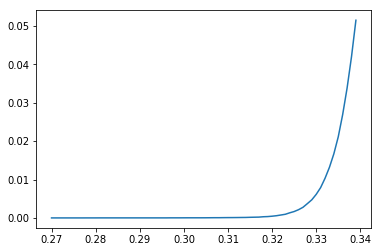

In [17]:
plt.plot(alp,y1)

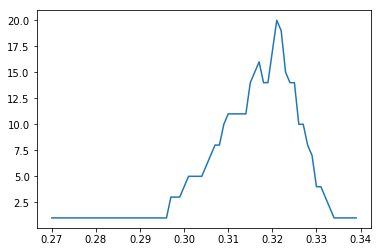

In [18]:
plt.plot(alp,y2)

In [27]:
alp="0-321"#alpha value with - instead of . (for output name automatic change)
bb,dens,comp=extract_bb(G,float(alp.replace('-','.')))
print("there are:", len(bb.nodes()), "nodes")
print("there are:", len(bb.edges()), "links")

there are: 92 nodes
there are: 113 links


In [28]:
ww=open("data/cell_lines_corr-above0-5-"+alp+".net","w")
ww.write("#SOURCE\t#TARGET\t#WEIGHT\n")
Link_tab=nx.get_edge_attributes(bb,'weight')
for i in bb.edges():
    ww.write(str(i[0]+1)+"\t"+str(i[1]+1)+"\t"+str(Link_tab[i]["weight"])+"\n")
ww.close()


In [29]:
info=open("data/cell_info.txt",'r').read()
info=info.split("\n")
info.remove("")
header=info[0].split("\t")[0]+"\t"+info[0].split("\t")[5]+"\t"+info[0].split("\t")[37]#information related to DepMap_ID/Cancer_Type/Gender
info.remove(info[0])
dic={}
for i in info:
    tmp=i.split("\t")
    dic[tmp[0]]=[tmp[5],tmp[-1]]
for i in Cell:
    if i not in dic.keys():
        dic[i]=["NA", "NA"]
ww=open("data/cell_lines_corr-above0-5-"+alp+".nodes","w")
ww.write("Node_ID\t"+header+"\n")
for i in sorted(list(bb.nodes())):
    ww.write(str(i+1)+"\t"+Cell[i]+"\t"+dic[Cell[i]][0]+"\t"+dic[Cell[i]][1]+"\n")    
ww.close()

## Computing cancer_type-cancer_type links and node statistics

In [30]:
net=open("data/cell_lines_corr-above0-5-"+alp+".net","r").read()
net=net.split("\n")
net.remove("")
net.remove(net[0])
link_class={}
Nl=len(net)
C={}
ww1=open("data/cell_lines_corr-above0-5-"+alp+".linkclass.dat","w")
ww2=open("data/cell_lines_corr-above0-5-"+alp+".nodeclass.dat","w")
for i in Cell:
    for j in Cell:        
        link_class[dic[i][0]+":"+dic[j][0]]=0
        C[dic[i][0]]=0
        C[dic[j][0]]=0
LIST=[]
for l in net:
    tmp=l.split("\t")[0:2]
    link_class[dic[Cell[int(tmp[0])-1]][0]+":"+dic[Cell[int(tmp[1])-1]][0]]+=1
    if tmp[0] not in LIST:
        C[dic[Cell[int(tmp[0])-1]][0]]+=1
        LIST.append(tmp[0])
    if tmp[1] not in LIST:
        C[dic[Cell[int(tmp[1])-1]][0]]+=1
        LIST.append(tmp[1])
N=len(LIST)
rez={}
LIST=[]
cncer=[]
W=0
for i in link_class.keys():
    if i.split(":")[0] not in cncer:
        cncer.append(i.split(":")[0])
    if i.split(":")[1] not in cncer:
        cncer.append(i.split(":")[1])
    W+=link_class[i]
for i in range(len(cncer)):
    for j in range(i,len(cncer)):
        I=cncer[i]
        J=cncer[j]
        LIST.append(I+":"+J)
        if I!=J:
            rez[I+":"+J]=link_class[I+":"+J]+link_class[J+":"+I]
        if I==J:
            rez[I+":"+J]=link_class[I+":"+J]
link_class=[]
link_class_name=[]
for i in LIST:
    if rez[i]>0:
        z=0
        link_class_name.append(i)
        link_class.append(rez[i])
tmp=sorted(range(len(link_class)), key=lambda k : link_class[k], reverse=True)
ww1.write("#SOURCE\t#TARGET\t#LINK\n")
for i in tmp:
    ww1.write(link_class_name[i].replace(":","\t")+"\t"+str(link_class[i])+"\n")
ww1.close()
LIST=[[],[]]
for i in C.keys():
    if C[i]>0:        
        LIST[0].append(i)
        LIST[1].append(C[i])
tmp=sorted(range(len(LIST[0])), key=lambda k : LIST[1][k], reverse=True)
ww2.write("#CANCER"+"\t"+"#OCCURANCE"+"\n")
for i in tmp:
    ww2.write(LIST[0][i]+"\t"+str(LIST[1][i])+"\n")
ww2.close()


## Homophiliness


In [31]:
a=open("data/cell_lines_corr-above0-5-"+alp+".linkclass.dat","r").read()
a=a.split("\n")
a.remove("")
a.remove(a[0])
b=open("data/cell_lines_corr-above0-5-"+alp+".nodeclass.dat","r").read()
b=b.split("\n")
b.remove("")
b.remove(b[0])
HOM={}
DIFF={}
LINK=[]
BAL={}
ww=open("data/cell_lines_corr-above0-5-"+alp+".homophiliness","w")
for i in a:
    tmp=i.split("\t")
    HOM[tmp[0]]=0
    HOM[tmp[1]]=0
    DIFF[tmp[0]]=0
    DIFF[tmp[1]]=0
for i in a:
    tmp=i.split("\t")
    if tmp[0] != tmp[1]:
        DIFF[tmp[0]]+=int(tmp[2])
        DIFF[tmp[1]]+=int(tmp[2])
    else:
        HOM[tmp[0]]+=int(tmp[2])
LIST=[[],[]]
for i in a:
    tmp=i.split("\t")
    BAL[tmp[0]]=(1.0*(HOM[tmp[0]]-DIFF[tmp[0]]))/(1.0*(HOM[tmp[0]]+DIFF[tmp[0]]))
    if tmp[0] not in LIST[0]:
        LIST[0].append(tmp[0])
        LIST[1].append(BAL[tmp[0]])
    BAL[tmp[1]]=(1.0*(HOM[tmp[1]]-DIFF[tmp[1]]))/(1.0*(HOM[tmp[1]]+DIFF[tmp[1]]))
    if tmp[1] not in LIST[0]:
        LIST[0].append(tmp[1])
        LIST[1].append(BAL[tmp[1]])
C={}
for i in b:
    tmp=i.split("\t")
    C[tmp[0]]=tmp[1]
tmp=sorted(range(len(LIST[0])), key=lambda k : LIST[1][k], reverse=True)
ww.write("#CANCER"+"\t"+"#HOMOPHILINESS"+"\t"+"#NODE_OCCURANCE"+"\n")
w=0.0
for i in tmp:
    ww.write(LIST[0][i]+"\t"+str(LIST[1][i])+"\t"+C[LIST[0][i]]+"\n")    
    if(LIST[1][i]<0.0):
        w+=1.0/len(tmp)
ww.close()
print("there are", round(w*100,2), " % cancer types having heterophylic connections")

there are 66.67  % cancer types having heterophylic connections


### Cell_Line Homophily


In [32]:
ww=open("data/cell_lines_corr-above0-5"+alp+"-cell.homophily","w")
ww.write("Node_ID\tDepMap_ID\t#HOMOPHILINESS\n")
a=open("data/cell_lines_corr-above0-5-"+alp+".net","r").read()
b=open("data/cell_lines_corr-above0-5-"+alp+".nodes","r").read()
a=a.split("\n")
b=b.split("\n")
a.remove("")
a.remove(a[0])
b.remove("")
b.remove(b[0])
print(a[0])
print(b[0])
w=0.0
D={}
H={}#Homophily
h={}#Heterophily
B={}
for i in b:
    tmp=i.split("\t")
    D[tmp[0]]=[tmp[1],tmp[2]]
    H[tmp[0]]=0.0
    h[tmp[0]]=0.0
    B[tmp[0]]=0.0
for i in a:
    tmp=i.split("\t")
    if(D[tmp[0]][1]==D[tmp[1]][1]):
        H[tmp[0]]+=1
        H[tmp[1]]+=1
    else:
        h[tmp[0]]+=1
        h[tmp[1]]+=1
for i in D.keys():
    B[i]=(H[i]-h[i])/(H[i]+h[i])
    if B[i]<0.0:
        w+=1.0/len(b)
for i in D.keys():
    ww.write(D[i][0]+"\t"+D[i][1]+str(B[i])+"\n")
ww.close()
print("there are", round(w*100,2), " % cell_lines having heterophylic connections")

12	16	0.751291222148
12	ACH-000019	Breast Cancer	Female
there are 41.3  % cell_lines having heterophylic connections


In [33]:
pd.DataFrame()

""


In [34]:
cdata = pd.read_csv("data/cell_lines_corr-above0-5-"+alp+".homophiliness",sep="\t")
cdata=cdata.rename(columns={'#HOMOPHILINESS':'Homophiliness', '#NODE_OCCURANCE':'Number of Cell Lines'})
cdata.head(5)

,#CANCER,Homophiliness,Number of Cell Lines
0,Kidney Cancer,1.000000,3
1,Leukemia,0.800000,13
2,Neuroblastoma,0.230769,7
3,Pancreatic Cancer,0.058824,13
4,Lymphoma,0.000000,5


In [71]:
fig = px.scatter(cdata, x='Number of Cell Lines', y='Homophiliness',text="#CANCER")
fig.update_traces(textposition='top center',marker={'size':12})
fig.write_image("figures/node-count_vs_homophily.svg")
fig.write_image("figures/node-count_vs_homophily.png")
fig.show()

ValueError: Image generation requires the psutil package.

Install using pip:
    $ pip install psutil

Install using conda:
    $ conda install psutil
